In [124]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import preprocessing_functions
import feature_engineering_functions
import pycaret
from pycaret.classification import *
from scipy.stats import pearsonr
from dataprep.eda import create_report
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

Basic preprocessing actions (Fitbit)
1. Select experiment dates
2. Drop duplicates
3. Type conversion
4. One hot encoding

In [125]:
fitbit=pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
fitbit=preprocessing_functions.fitbit_basic_preprocessing(fitbit)
fitbit=preprocessing_functions.fitbit_one_hot_encoding(fitbit)
fitbit

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4960,621e310d67b776a24003096d,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961,621e324e67b776a2400191cb,2022-01-17,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4962,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Basic preprocessing actions (Sema)
1. Group positive and negative feelings

In [126]:
sema=pd.read_pickle('data/semas_read_from_the_base_experiment_dates.pkl')
sema = sema.sort_values(by='date', ascending=True)
sema=preprocessing_functions.sema_basic_preprocessing(sema)
sema

,id,date,negative_feelings,positive_feelings
0,621e2f3967b776a240c654db,2021-05-24,0,1
11,621e362467b776a2404ad513,2021-05-24,0,1
10,621e301e67b776a240608a72,2021-05-24,0,1
9,621e30e467b776a240e817c7,2021-05-24,1,0
8,621e36f967b776a240e5e7c9,2021-05-24,1,0
...,...,...,...,...
4932,621e30f467b776a240f22944,2022-01-16,0,1
4946,621e2f9167b776a240011ccb,2022-01-17,1,0
4944,621e346f67b776a24081744f,2022-01-17,1,0
4945,621e30f467b776a240f22944,2022-01-17,0,1


In [127]:
# merge fitbit and sema
data = pd.merge(fitbit, sema, on=['date','id'], how='right')
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,negative_feelings,positive_feelings
0,621e2f3967b776a240c654db,2021-05-24,NaN,69.820,28.594,NaN,16.4,76.0,0.800000,0.850,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
1,621e362467b776a2404ad513,2021-05-24,34.526732,67.118,37.722,95.3,10.6,0.0,0.000000,0.000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
2,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,621e30e467b776a240e817c7,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,621e36f967b776a240e5e7c9,2021-05-24,NaN,59.911,61.157,95.4,15.0,83.0,0.933333,0.775,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,621e30f467b776a240f22944,2022-01-16,33.503907,52.846,55.602,NaN,12.8,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
4944,621e2f9167b776a240011ccb,2022-01-17,34.716690,58.489,28.329,96.5,14.2,76.0,0.800000,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4945,621e346f67b776a24081744f,2022-01-17,32.903545,71.863,25.475,NaN,18.2,72.0,0.833333,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4946,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [128]:
data = data.drop(columns=['positive_feelings'])
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,negative_feelings
0,621e2f3967b776a240c654db,2021-05-24,NaN,69.820,28.594,NaN,16.4,76.0,0.800000,0.850,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,621e362467b776a2404ad513,2021-05-24,34.526732,67.118,37.722,95.3,10.6,0.0,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,621e30e467b776a240e817c7,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,621e36f967b776a240e5e7c9,2021-05-24,NaN,59.911,61.157,95.4,15.0,83.0,0.933333,0.775,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,621e30f467b776a240f22944,2022-01-16,33.503907,52.846,55.602,NaN,12.8,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4944,621e2f9167b776a240011ccb,2022-01-17,34.716690,58.489,28.329,96.5,14.2,76.0,0.800000,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4945,621e346f67b776a24081744f,2022-01-17,32.903545,71.863,25.475,NaN,18.2,72.0,0.833333,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4946,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Preprocessing steps added:
1. drop 'spo2', 'scl_avg'
2. replace outliers and NaNs with columns median
3. date engineering

In [129]:
data = preprocessing_functions.post_preprocessing(data, isSema=True)
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,Yoga/Pilates,negative_feelings,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2f3967b776a240c654db,33.991756,69.820,28.5940,16.4,76.0,0.800000,0.850,0.600000,-1.184004,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
1,621e362467b776a2404ad513,34.526732,67.118,37.7220,10.6,77.0,0.800000,0.750,0.766667,-3.007565,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
2,621e301e67b776a240608a72,34.710232,61.555,35.4345,14.4,74.0,0.700000,0.700,0.833333,-1.822489,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
3,621e30e467b776a240e817c7,33.991756,61.555,35.4345,14.4,77.0,0.800000,0.750,0.766667,-1.379863,...,0.0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
4,621e36f967b776a240e5e7c9,33.991756,59.911,61.1570,15.0,83.0,0.933333,0.775,0.800000,-2.530838,...,0.0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,621e30f467b776a240f22944,33.503907,52.846,55.6020,12.8,77.0,0.800000,0.750,0.766667,-2.560771,...,0.0,0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869
4944,621e2f9167b776a240011ccb,34.716690,58.489,28.3290,14.2,76.0,0.800000,0.600,0.933333,-2.096381,...,0.0,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4945,621e346f67b776a24081744f,32.903545,71.863,25.4750,18.2,72.0,0.833333,0.625,0.733333,-3.234348,...,0.0,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4946,621e30f467b776a240f22944,34.352490,61.555,35.4345,13.4,77.0,0.800000,0.750,0.766667,-2.346201,...,0.0,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139


# Adds wear_day

In [74]:
data['wear_day'] = data.apply(feature_engineering_functions.f, axis=1)
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,negative_feelings,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,wear_day
0,621e2f3967b776a240c654db,33.991756,69.820,28.5940,16.4,76.0,0.800000,0.850,0.600000,-1.184004,...,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1
1,621e362467b776a2404ad513,34.526732,67.118,37.7220,10.6,77.0,0.800000,0.750,0.766667,-3.007565,...,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1
2,621e301e67b776a240608a72,34.710232,61.555,35.4345,14.4,74.0,0.700000,0.700,0.833333,-1.822489,...,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1
3,621e30e467b776a240e817c7,33.991756,61.555,35.4345,14.4,77.0,0.800000,0.750,0.766667,-1.379863,...,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1
4,621e36f967b776a240e5e7c9,33.991756,59.911,61.1570,15.0,83.0,0.933333,0.775,0.800000,-2.530838,...,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,621e30f467b776a240f22944,33.503907,52.846,55.6020,12.8,77.0,0.800000,0.750,0.766667,-2.560771,...,0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869,1
4944,621e2f9167b776a240011ccb,34.716690,58.489,28.3290,14.2,76.0,0.800000,0.600,0.933333,-2.096381,...,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1
4945,621e346f67b776a24081744f,32.903545,71.863,25.4750,18.2,72.0,0.833333,0.625,0.733333,-3.234348,...,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1
4946,621e30f467b776a240f22944,34.352490,61.555,35.4345,13.4,77.0,0.800000,0.750,0.766667,-2.346201,...,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1


In [41]:
data.columns

Index([                              'id',              'nightly_temperature',
                                 'nremhr',                            'rmssd',
              'full_sleep_breathing_rate',                     'stress_score',
                'sleep_points_percentage',       'exertion_points_percentage',
       'responsiveness_points_percentage',      'daily_temperature_variation',
                               'calories',        'filteredDemographicVO2Max',
                               'distance',                              'bpm',
                 'lightly_active_minutes',        'moderately_active_minutes',
                    'very_active_minutes',                'sedentary_minutes',
                             'resting_hr',                   'sleep_duration',
                    'minutesToFallAsleep',                    'minutesAsleep',
                           'minutesAwake',               'minutesAfterWakeup',
                       'sleep_efficiency',          

# Adds stress_quantile

In [42]:
data["stress_quantile"] = pd.qcut(data["stress_score"].rank(method='first'), [0, .25, .75, 1], labels=["low", "medium", "high"])
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,wear_day,stress_quantile
0,621e2f3967b776a240c654db,33.991756,69.820,28.5940,16.4,76.0,0.800000,0.850,0.600000,-1.184004,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,low
1,621e362467b776a2404ad513,34.526732,67.118,37.7220,10.6,77.0,0.800000,0.750,0.766667,-3.007565,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,low
2,621e301e67b776a240608a72,34.710232,61.555,35.4345,14.4,74.0,0.700000,0.700,0.833333,-1.822489,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,low
3,621e30e467b776a240e817c7,33.991756,61.555,35.4345,14.4,77.0,0.800000,0.750,0.766667,-1.379863,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,low
4,621e36f967b776a240e5e7c9,33.991756,59.911,61.1570,15.0,83.0,0.933333,0.775,0.800000,-2.530838,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,621e30f467b776a240f22944,33.503907,52.846,55.6020,12.8,77.0,0.800000,0.750,0.766667,-2.560771,...,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869,1,high
4944,621e2f9167b776a240011ccb,34.716690,58.489,28.3290,14.2,76.0,0.800000,0.600,0.933333,-2.096381,...,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1,low
4945,621e346f67b776a24081744f,32.903545,71.863,25.4750,18.2,72.0,0.833333,0.625,0.733333,-3.234348,...,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1,low
4946,621e30f467b776a240f22944,34.352490,61.555,35.4345,13.4,77.0,0.800000,0.750,0.766667,-2.346201,...,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1,high


<AxesSubplot: xlabel='count', ylabel='stress_quantile'>

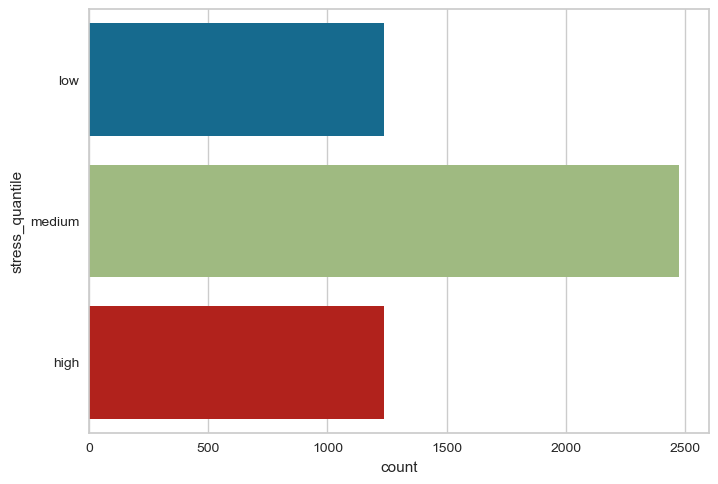

In [43]:
sns.countplot(y="stress_quantile", data=data)

In [44]:
data['stress_quantile'].replace(to_replace=['low', 'medium', 'high'], value=[0, 1, 2], inplace=True)
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,wear_day,stress_quantile
0,621e2f3967b776a240c654db,33.991756,69.820,28.5940,16.4,76.0,0.800000,0.850,0.600000,-1.184004,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,0
1,621e362467b776a2404ad513,34.526732,67.118,37.7220,10.6,77.0,0.800000,0.750,0.766667,-3.007565,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,0
2,621e301e67b776a240608a72,34.710232,61.555,35.4345,14.4,74.0,0.700000,0.700,0.833333,-1.822489,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,0
3,621e30e467b776a240e817c7,33.991756,61.555,35.4345,14.4,77.0,0.800000,0.750,0.766667,-1.379863,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,0
4,621e36f967b776a240e5e7c9,33.991756,59.911,61.1570,15.0,83.0,0.933333,0.775,0.800000,-2.530838,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,621e30f467b776a240f22944,33.503907,52.846,55.6020,12.8,77.0,0.800000,0.750,0.766667,-2.560771,...,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869,1,2
4944,621e2f9167b776a240011ccb,34.716690,58.489,28.3290,14.2,76.0,0.800000,0.600,0.933333,-2.096381,...,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1,0
4945,621e346f67b776a24081744f,32.903545,71.863,25.4750,18.2,72.0,0.833333,0.625,0.733333,-3.234348,...,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1,0
4946,621e30f467b776a240f22944,34.352490,61.555,35.4345,13.4,77.0,0.800000,0.750,0.766667,-2.346201,...,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1,2


<AxesSubplot: xlabel='count', ylabel='stress_quantile'>

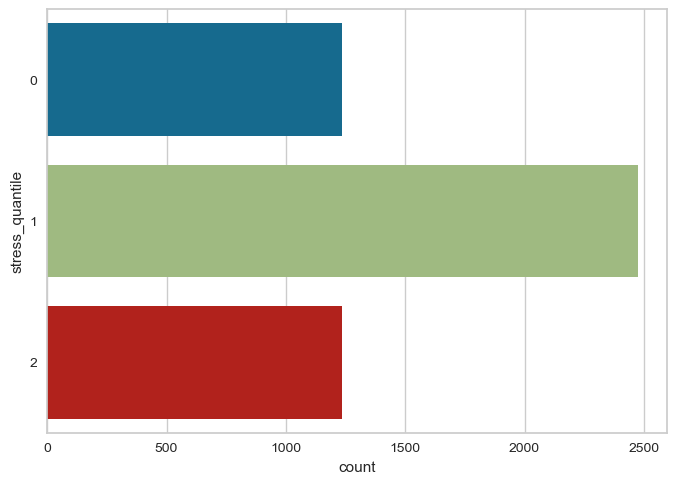

In [45]:
sns.countplot(y="stress_quantile", data=data)

# Adds sleep duration average values for each user

In [130]:
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,Yoga/Pilates,negative_feelings,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2f3967b776a240c654db,33.991756,69.820,28.5940,16.4,76.0,0.800000,0.850,0.600000,-1.184004,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
1,621e362467b776a2404ad513,34.526732,67.118,37.7220,10.6,77.0,0.800000,0.750,0.766667,-3.007565,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
2,621e301e67b776a240608a72,34.710232,61.555,35.4345,14.4,74.0,0.700000,0.700,0.833333,-1.822489,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
3,621e30e467b776a240e817c7,33.991756,61.555,35.4345,14.4,77.0,0.800000,0.750,0.766667,-1.379863,...,0.0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
4,621e36f967b776a240e5e7c9,33.991756,59.911,61.1570,15.0,83.0,0.933333,0.775,0.800000,-2.530838,...,0.0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,621e30f467b776a240f22944,33.503907,52.846,55.6020,12.8,77.0,0.800000,0.750,0.766667,-2.560771,...,0.0,0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869
4944,621e2f9167b776a240011ccb,34.716690,58.489,28.3290,14.2,76.0,0.800000,0.600,0.933333,-2.096381,...,0.0,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4945,621e346f67b776a24081744f,32.903545,71.863,25.4750,18.2,72.0,0.833333,0.625,0.733333,-3.234348,...,0.0,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4946,621e30f467b776a240f22944,34.352490,61.555,35.4345,13.4,77.0,0.800000,0.750,0.766667,-2.346201,...,0.0,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139


In [131]:
data['sleep_repetition'] = data['id'].map(data.groupby('id')['sleep_duration'].unique())
data['average_sleep_duration']=pd.DataFrame(data['sleep_repetition'].values.tolist()).mean(1)
data = data.drop(columns=['sleep_repetition'])

In [132]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [133]:
grid = setup(data=train_data, target='negative_feelings', silent=True, session_id=123, fold_strategy='groupkfold',
              fold=3,  fold_groups=fold_groups, test_data=test_data, normalize=True, normalize_method='minmax', transformation=True, feature_interaction = True, feature_ratio = True, fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,negative_feelings
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3248, 65)"
5,Missing Values,False
6,Numeric Features,58
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='negative_feelings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                n...
                ('fix_perfect', Remove_100(target='negative_feelings')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough')

In [134]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5791,0.5997,0.5401,0.5315,0.5354,0.1509,0.1511,1.6600
lightgbm,Light Gradient Boosting Machine,0.5668,0.5890,0.5467,0.5194,0.5312,0.1310,0.1317,0.7167
ada,Ada Boost Classifier,0.5625,0.5713,0.4672,0.5166,0.4897,0.1095,0.1104,0.4567
nb,Naive Bayes,0.5594,0.5580,0.4264,0.5073,0.4298,0.0816,0.0924,0.6667
rf,Random Forest Classifier,0.5594,0.5789,0.5686,0.5098,0.5365,0.1204,0.1213,0.3200
dummy,Dummy Classifier,0.5505,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1400
et,Extra Trees Classifier,0.5403,0.5475,0.5346,0.4899,0.5086,0.0771,0.0781,0.2467
lr,Logistic Regression,0.5394,0.5463,0.4433,0.4888,0.4632,0.0636,0.0642,1.2767
lda,Linear Discriminant Analysis,0.5363,0.5437,0.4562,0.4884,0.4648,0.0647,0.0659,0.1633
ridge,Ridge Classifier,0.5360,0.0000,0.4562,0.4881,0.4647,0.0641,0.0653,0.1500


create_model_container: 14
master_model_container: 14
display_container: 2
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
compare_models() succesfully completed......................................


In [135]:
best

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

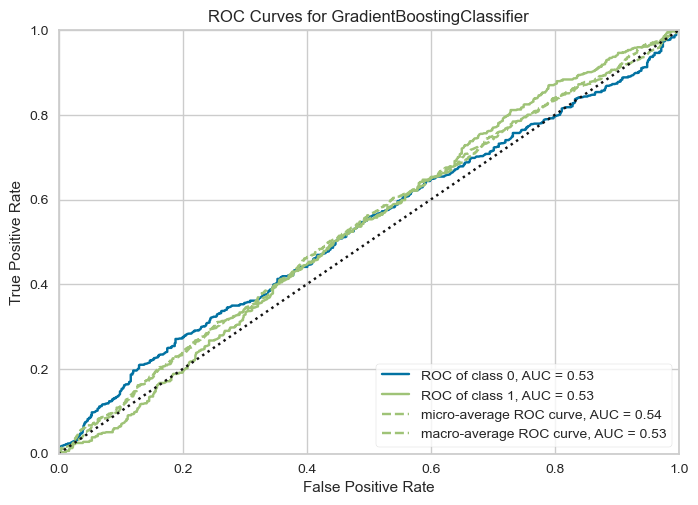

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [136]:
plot_model(best, plot='auc')

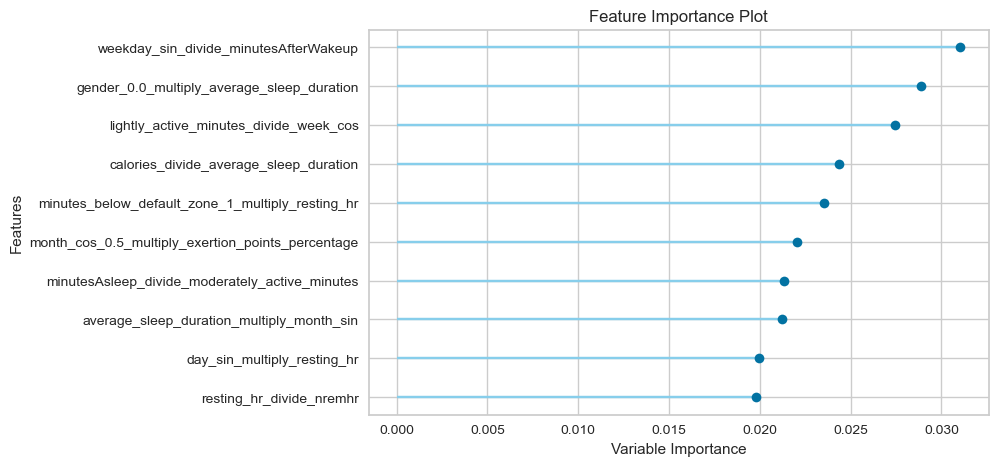

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [137]:
plot_model(best, plot='feature')